In [0]:
# numpy implementation of RNN

In [0]:
import numpy as np
timesteps = 100
input_features = 32
output_features = 64


In [0]:
inputs = np.random.random((timesteps,input_features))


In [0]:
state_t = np.zeros((output_features))

In [0]:
W = np.random.random((output_features,input_features))
U = np.random.random((output_features,output_features))
b = np.random.random((output_features,))

In [0]:
successive_outputs = [] 

In [0]:
for input_t in inputs:
  #combining input  with current state
  output_t = np.tanh(np.dot(W,input_t)+np.dot(U,state_t)+b)
  successive_outputs.append(output_t)
  #setting state for next time step
  state_t = output_t 
final_output_sequence = np.concatenate(successive_outputs,axis=0)
#final_output_2d tensor of form (timesteps,output_features)
#last output will have info regarding all the previous states

In [10]:
final_output_sequence.shape

(6400,)

In [0]:
# Rnn in Keras - numpy RNN = Simple RNN in Keras

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
from keras.layers import SimpleRNN

In [14]:
from keras.models import Sequential
from keras.layers import Embedding
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()
#returns only output at last time step


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [15]:
# return full sequences at each time step
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [16]:
#using multiple simpleRNN layers
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))
model.summary()
# intermediate layers should return full sequences of outputs to be fed to the next layer

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Simple LSTM on IMDB 

In [0]:
from keras.datasets import imdb

In [0]:
from keras.preprocessing import sequence

In [0]:
max_features =10000
maxlen=500
batch_size=32

In [0]:
(input_train,y_train),(input_test,y_test)=imdb.load_data(num_words=max_features)

In [23]:
len(input_train)

25000

In [24]:
len(input_test)

25000

In [0]:
#padding sequences

In [0]:
input_train = sequence.pad_sequences(input_train,maxlen=maxlen)
input_test = sequence.pad_sequences(input_test,maxlen=maxlen)

In [29]:
input_train.shape

(25000, 500)

In [30]:
input_test.shape

(25000, 500)

In [0]:
from keras.layers import Dense

In [0]:
model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

In [0]:
from keras.optimizers import RMSprop

In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [36]:
history = model.fit(input_train,y_train,epochs=20,batch_size=128,validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 22s 1ms/step - loss: 0.6357 - acc: 0.6154 - val_loss: 0.5478 - val_acc: 0.7160
Epoch 2/20
20000/20000 [==============================] - 21s 1ms/step - loss: 0.4061 - acc: 0.8262 - val_loss: 0.4228 - val_acc: 0.8138
Epoch 3/20
20000/20000 [==============================] - 22s 1ms/step - loss: 0.3306 - acc: 0.8682 - val_loss: 0.3571 - val_acc: 0.8598
Epoch 4/20
20000/20000 [==============================] - 22s 1ms/step - loss: 0.2446 - acc: 0.9064 - val_loss: 0.4039 - val_acc: 0.8420
Epoch 5/20
20000/20000 [==============================] - 22s 1ms/step - loss: 0.2007 - acc: 0.9251 - val_loss: 0.3645 - val_acc: 0.8646
Epoch 6/20
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1432 - acc: 0.9496 - val_loss: 0.4014 - val_acc: 0.8662
Epoch 7/20
20000/20000 [==============================] - 22s 1ms/step - loss: 0.1033 - acc: 0.9649 - val_loss: 0.4360 - val_acc:

In [0]:
import matplotlib.pyplot as plt

In [0]:
hist = history.history

In [39]:
hist.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
acc = hist['acc']
val_loss = hist['val_loss']
val_acc = hist['val_acc']
loss = hist['loss']

In [0]:
epochs = range(1,len(acc)+1)

No handles with labels found to put in legend.


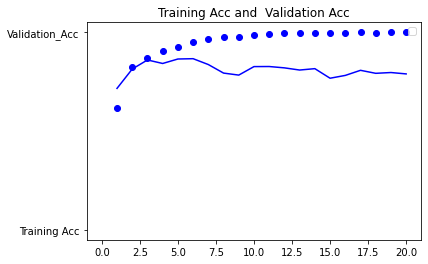

In [53]:
plt.plot(epochs,acc,'bo','Training Acc')
plt.plot(epochs,val_acc,'b','Validation_Acc')
plt.title('Training Acc and  Validation Acc')
plt.legend()
plt.show()

No handles with labels found to put in legend.


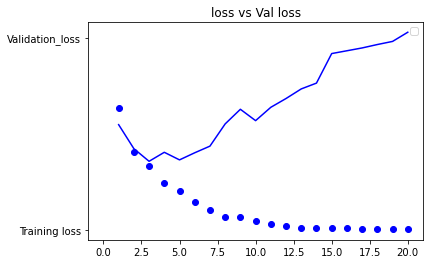

In [49]:

plt.figure()
plt.plot(epochs,loss,'bo','Training loss')
plt.plot(epochs,val_loss,'b','Validation_loss')

plt.title('loss vs Val loss')
plt.legend()
plt.show()